In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals import joblib

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [3]:
dataset_train  = pd.read_csv('datasets/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head(3)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.5,235.0,234.25,2240909,5248.60


In [4]:
print(training_set[2030:])

[[117.6]
 [120.1]
 [121.8]
 [120.3]
 [122.1]]


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
print(training_set_scaled[2030:])

[[0.14801298]
 [0.15815085]
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [7]:
training_set_scaled[0]

array([0.6202352])

In [8]:
dataset_train.shape

(2035, 8)

In [19]:
X_train = []
y_train = []

data_length = 30
for i in range(data_length, dataset_train.shape[0]):
    X_train.append(training_set_scaled[i-data_length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
    
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
print(X_train[0].tolist())

[[0.620235198702352], [0.6222627737226277], [0.6443633414436334], [0.6171938361719383], [0.6182076236820763], [0.6240875912408759], [0.6279399837793997], [0.6358475263584753], [0.6165855636658556], [0.577250608272506], [0.5484590429845904], [0.5733982157339821], [0.5733982157339821], [0.5673154906731549], [0.5794809407948094], [0.5713706407137064], [0.6370640713706407], [0.6281427412814273], [0.6321978913219789], [0.6255068937550688], [0.6194241686942417], [0.6321978913219789], [0.6111111111111112], [0.6220600162206001], [0.6455798864557989], [0.6723438767234386], [0.6605839416058394], [0.6476074614760746], [0.628345498783455], [0.6240875912408759]]


In [21]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer ='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
2005/2005 [==============================] - 22s 11ms/step - loss: 0.0085
Epoch 2/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0030
Epoch 3/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0025
Epoch 4/100
2005/2005 [==============================] - 7s 4ms/step - loss: 0.0025
Epoch 5/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0022
Epoch 6/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0020
Epoch 7/100
2005/2005 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 8/100
2005/2005 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 9/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0018
Epoch 10/100
2005/2005 [==============================] - 7s 4ms/step - loss: 0.0017
Epoch 11/100
2005/2005 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 12/100
2005/2005 [==============================] - 7s 4ms/step - 

2005/2005 [==============================] - 7s 3ms/step - loss: 6.9709e-04
Epoch 95/100
2005/2005 [==============================] - 8s 4ms/step - loss: 6.3507e-04
Epoch 96/100
2005/2005 [==============================] - 7s 4ms/step - loss: 6.5766e-04
Epoch 97/100
2005/2005 [==============================] - 7s 4ms/step - loss: 6.3347e-04
Epoch 98/100
2005/2005 [==============================] - 7s 4ms/step - loss: 6.4402e-04
Epoch 99/100
2005/2005 [==============================] - 7s 4ms/step - loss: 6.3839e-04
Epoch 100/100
2005/2005 [==============================] - 7s 4ms/step - loss: 6.2958e-04


In [12]:
joblib.dump(regressor, 'regressor.pkl')

['regressor.pkl']

In [13]:
regressor = joblib.load('regressor.pkl')

In [14]:
dataset_test = pd.read_csv('datasets/tatatest.csv')

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-data_length:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
y_test = []

for i in range(data_length, data_length+len(dataset_test)):
    X_test.append(inputs[i-data_length:i, 0])
    y_test.append(inputs[i, 0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(y_test)

real_stock_price.shape

(16, 1)

In [16]:
print(real_stock_price)

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [17]:
print(predicted_stock_price[1])
print(real_stock_price[1])

[200.50218]
[221.1]


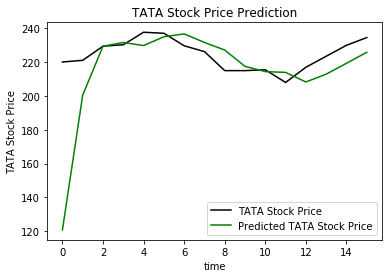

In [18]:
plt.plot(real_stock_price, color ='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label = 'Predicted TATA Stock Price')
plt.title("TATA Stock Price Prediction")
plt.xlabel('time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()